In [17]:
from preprocessing import clean_df
from preprocessing import create_target
from preprocessing import create_feature_dataframe

from model import column_index
from model import create_model

from make_prediction import clean_df_pred
from make_prediction import make_prediction

from final_pipeline import Process_Result

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import pickle

%matplotlib inline

In [18]:
!ls

Final_pipeline.ipynb	  make_prediction.pyc  __pycache__
final_pipeline.py	  model.py	       README.md
final_pipeline.pyc	  model.pyc	       recs2009_public.csv
green_plan_it_input.xlsx  pipe_model.p	       Untitled.ipynb
input.csv		  preprocessing.py     website
make_prediction.py	  preprocessing.pyc


In [19]:
df = pd.read_csv('recs2009_public.csv')


In [20]:
#df_pred = pd.read_csv('green_plan_it_input.csv')

In [21]:
with open('pipe_model.p', 'rb') as f:
    pipe = pickle.load(f)

In [22]:
df = clean_df(df)

In [23]:
X = create_feature_dataframe(df)

In [24]:
y = create_target(df)

In [25]:
def column_index(df, query_cols):
    """
    Creates indecies from column names to be used in OneHotEncoder
    Input 
    ------- 
    Dataframe with all columns
    query_cols columns which indicies will be returned

    Output
    -------
    Indicies of columns from input
    """


    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]


In [26]:
col_dummies_index = column_index(X, ['DIVISION','REPORTABLE_DOMAIN',
               'TYPEHUQ','Climate_Region_Pub',
               'AIA_Zone','CONDCOOP','CONVERSION','WALLTYPE','ROOFTYPE',
               'STOVENFUEL','STOVEFUEL','OVENFUEL', 'OVENUSE','AMTMICRO',
               'OUTGRILLFUEL', 'NUMMEAL','FUELFOOD', 'TVTYPE1','PCTYPE1',
               'EQUIPM', 'FUELHEAT', 'NGFPFLUE','USENGFP','DIFFUEL','EQMAMT',
               'H2OTYPE1', 'FUELH2O', 'COOLTYPE', 'FUELPOOL','FUELTUB','TYPEGLASS',
               'ADQINSUL','DRAFTY'])


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 52)

In [28]:
#pipe = Process_Result('pipe_model.p')
#type(pipe)

In [29]:
energy_pred = make_prediction(pipe, X_test)
max(energy_pred)

858552.8818756988

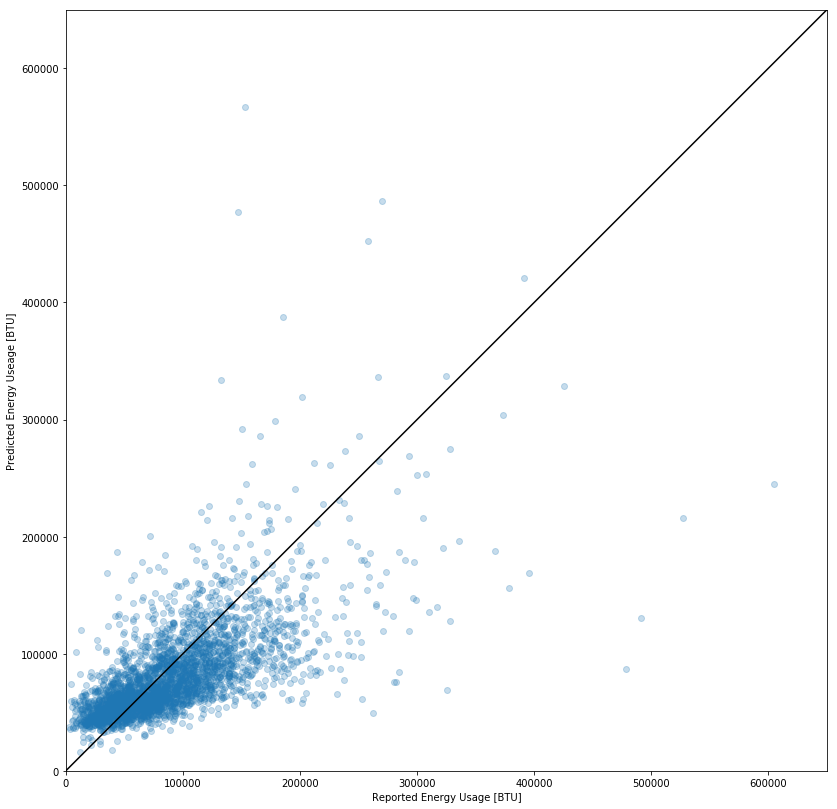

In [35]:
plt.xlim(0, 650000)
plt.ylim(0, 650000)
plt.gca().set_aspect('equal', adjustable='box')
x = np.linspace(0,650000)
plt.plot(x,x, color = 'black')


plt.scatter(y_test, energy_pred, alpha= .25)
plt.ylabel('Predicted Energy Useage [BTU]')
plt.xlabel('Reported Energy Usage [BTU]')
plt.rcParams["figure.figsize"] = [14,14]

plt.savefig("act_vs_pred.png")

In [ ]:
plt.xlim(0, 650000)
plt.ylim(0, 650000)
plt.gca().set_aspect('equal', adjustable='box')
x = np.linspace(0,650000)
plt.plot(x,x, color = 'black')


plt.scatter(y_test, np.exp(energy_predictions), alpha= .25)
plt.ylabel('Predicted Energy Useage')
plt.xlabel('Reported Energy Usage')
plt.rcParams["figure.figsize"] = [14,14]



In [ ]:
df_pred = clean_df_pred(df_pred)

In [ ]:
df_pred = clean_df(df_pred)

In [ ]:
df_pred = create_feature_dataframe(df_pred)

In [ ]:
pred = make_prediction(pipe, df_pred)

In [ ]:
pred

In [ ]:
#df_pred = df_pred.T

In [ ]:
#new_header = df_pred.iloc[0] 
#df_pred = df_pred[1:] 
#df_pred.columns = new_header
#df_pred = df_pred.iloc[[3]]

In [ ]:
#df_pred

In [ ]:
#X, y = clean_df(df)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, random_state = 52)

In [ ]:
#ridge_model = Ridge()
#ridge_model.fit(X_train, np.log(y_train))
#energy_preds = ridge_model.predict(X_test)

In [ ]:
#plt.xlim(0, 650000)
#plt.ylim(0, 650000)
#plt.gca().set_aspect('equal', adjustable='box')
#x = np.linspace(0,650000)
#plt.plot(x,x, color = 'black')

#y_plus_20 = (2)*x
#y_minus_20 = (0.5)*x

#plt.scatter(y_test, np.exp(energy_preds), alpha= .25)
#plt.ylabel('Predicted Energy Useage')
#plt.xlabel('Reported Energy Usage')
#plt.rcParams["figure.figsize"] = [14,14]

#plt.plot(x,y_plus_20, color = 'red')
#plt.plot(x,y_minus_20, color = 'red')

In [ ]:
#df_pred = clean_df(df_pred)

In [ ]:
#test = ridge_model.predict(df_pred)